In [68]:
#import relevant python ML libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from tkinter import *
import joblib

In [69]:
#Import dataset
Pizza_Data = pd.read_csv(r"C:\Users\Owner\Downloads\pizza_v2.csv")

In [70]:
Pizza_Data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [71]:
Pizza_Data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [72]:
Pizza_Data.shape

(129, 9)

In [73]:
print('The Number of Rows', Pizza_Data.shape[0])
print('The Number of Columns', Pizza_Data.shape[1])

The Number of Rows 129
The Number of Columns 9


In [74]:
Pizza_Data.info() #Information about the Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [75]:
Pizza_Data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [76]:
Pizza_Data.isnull().sum() #No missing Data in the Dataset

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

## Data Preprocessing 

In [77]:
#Renamin the Price_Ruphia column

Pizza_Data.rename({'price_rupiah':'Price'}, axis = 1, inplace= True)

In [78]:
Pizza_Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [79]:
#Replacing the Rp or removing the RP unit in the price column

Pizza_Data['Price'] = Pizza_Data['Price'].str.replace('Rp','')
Pizza_Data['Price'] = Pizza_Data['Price'].str.replace(',','').astype('int32')

In [80]:
Pizza_Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [81]:
Pizza_Data.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   Price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [82]:
#convert Rupiah to GBP with prevailing exchange rate as seen on google
def convert (value):
    return value*0.000054

In [83]:
Pizza_Data['Price'] = Pizza_Data['Price'].apply(convert)

In [84]:
Pizza_Data.head(5)

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,12.690,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,10.692,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,6.480,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,8.370,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,13.392,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [85]:
#replacing the inches with an empty string
Pizza_Data['diameter']= Pizza_Data['diameter'].str.replace('inch','')
Pizza_Data['diameter']= Pizza_Data['diameter'].str.replace('','').astype('float32')

In [86]:
Pizza_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   Price            129 non-null    float64
 2   diameter         129 non-null    float32
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float32(1), float64(1), object(7)
memory usage: 8.7+ KB


# Univariate Analysis

In [87]:
Pizza_Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,12.690,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,10.692,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,6.480,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,8.370,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,13.392,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [88]:
#Checking for columns
Pizza_Data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [89]:
Pizza_Data['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

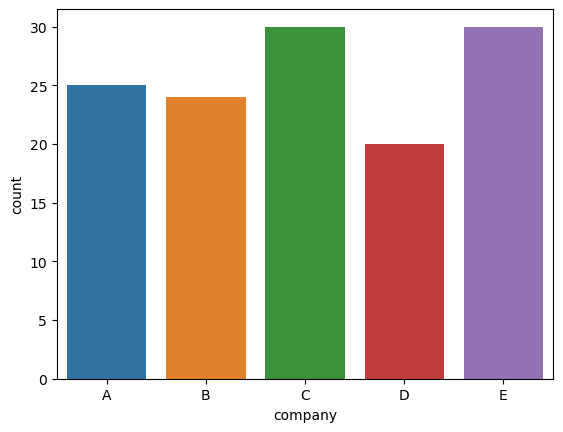

In [90]:
# visualizing the above count we use countplot in seaborne library

sns.countplot(Pizza_Data['company'])
plt.show()

In [91]:
Pizza_Data['Price'].value_counts()

3.888     11
4.860      8
2.484      7
5.184      5
4.482      5
2.646      5
4.050      5
3.780      4
5.940      4
5.346      4
2.106      4
8.046      4
7.560      4
3.726      3
6.210      3
4.212      3
1.890      3
3.240      3
2.376      3
5.022      3
1.674      3
1.269      3
5.292      3
6.642      2
1.782      2
4.104      2
6.426      2
6.156      2
10.152     2
12.420     2
5.670      2
6.831      2
1.512      1
2.754      1
4.536      1
1.728      1
2.916      1
12.690     1
10.692     1
13.392     1
8.370      1
6.480      1
4.968      1
Name: Price, dtype: int64

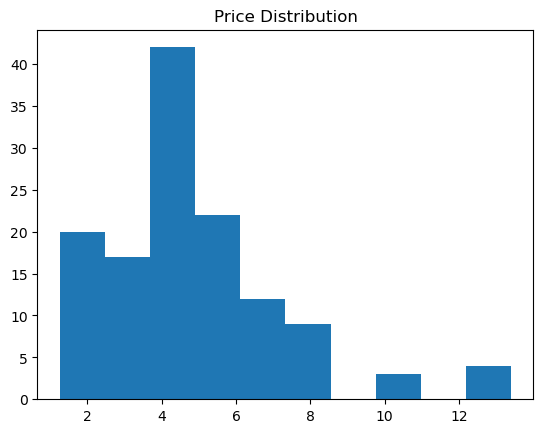

In [92]:
plt.hist(x = 'Price', data = Pizza_Data)
plt.title('Price Distribution')
plt.show()

In [93]:
Pizza_Data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

<AxesSubplot:xlabel='diameter', ylabel='count'>

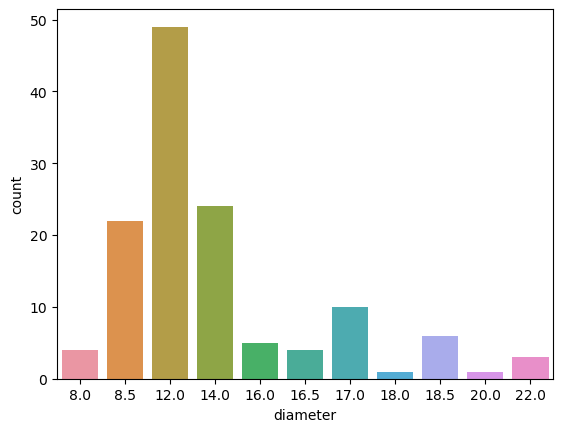

In [94]:
sns.countplot(Pizza_Data['diameter'])

(array([26.,  0., 49.,  0., 24.,  5., 14.,  7.,  1.,  3.]),
 array([ 8. ,  9.4, 10.8, 12.2, 13.6, 15. , 16.4, 17.8, 19.2, 20.6, 22. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

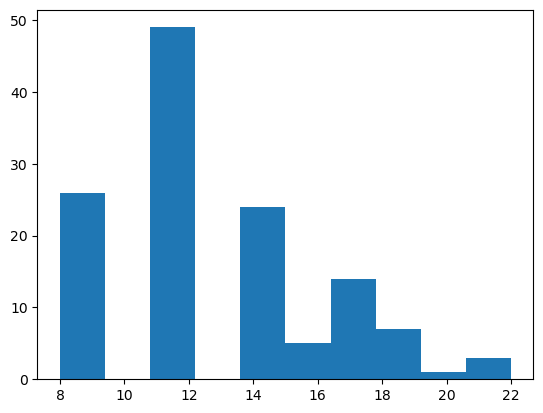

In [95]:
plt.hist(x = 'diameter', data = Pizza_Data)

In [96]:
Pizza_Data['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

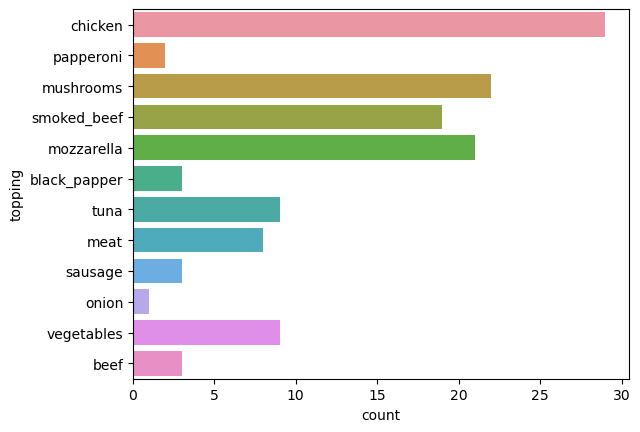

In [97]:
sns.countplot(y = 'topping', data = Pizza_Data)

In [98]:
Pizza_Data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

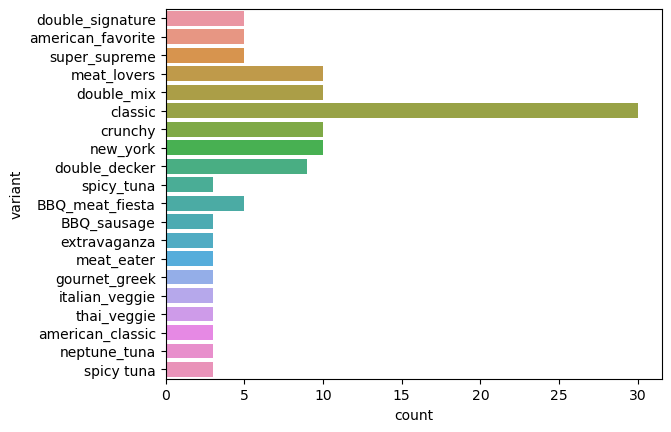

In [99]:
sns.countplot(y = 'variant', data = Pizza_Data)

# Multivariate

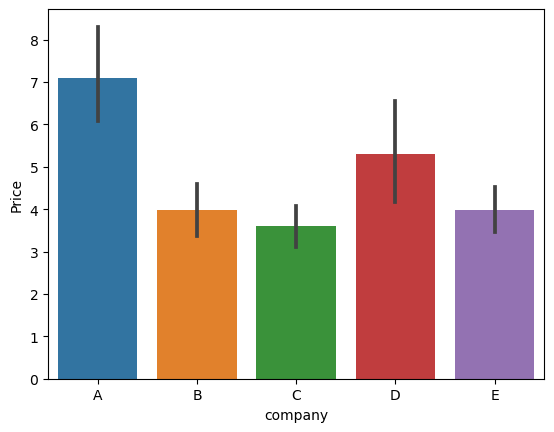

In [100]:
sns.barplot(x = 'company', y = 'Price', data = Pizza_Data)
plt.show()

In [101]:
Pizza_Data[Pizza_Data['Price'].max() == Pizza_Data['Price']]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,13.392,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [102]:
#Xl size pizza diameter
Pizza_Data[Pizza_Data['size']=='XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

In [103]:
#JUMBO size pizza

Pizza_Data[Pizza_Data['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

In [104]:
#16 was found in Jumbo sized piza but not found in XL size, hence considered an outlier
Pizza_Data[(Pizza_Data['size']=='jumbo') & (Pizza_Data['diameter']<=16)]
Pizza_Data = Pizza_Data.drop(Pizza_Data.index[[6,11,16,80]])

In [105]:
Pizza_Data[(Pizza_Data['size']=='jumbo') & (Pizza_Data['diameter']<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


In [106]:
#label encoding 

Cate_col = Pizza_Data.select_dtypes(include= ['object']).columns

In [107]:
en= LabelEncoder() 
for i in Cate_col:
    Pizza_Data[i]= en.fit_transform(Pizza_Data[i])

In [108]:
Pizza_Data.head()

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,12.690,22.0,2,8,1,1,1,0
1,0,10.692,20.0,7,8,1,1,1,0
2,0,6.480,16.0,5,8,4,1,1,1
3,0,8.370,14.0,9,8,4,1,0,1
4,0,13.392,18.0,4,8,1,1,0,1


In [109]:
#storing Independent variable in X and Dependent Variable which is price in Y

X = Pizza_Data.drop('Price', axis = 1)
y = Pizza_Data['Price']


In [110]:
X

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,22.0,2,8,1,1,1,0
1,0,20.0,7,8,1,1,1,0
2,0,16.0,5,8,4,1,1,1
3,0,14.0,9,8,4,1,0,1
4,0,18.0,4,8,1,1,0,1
...,...,...,...,...,...,...,...,...
124,4,8.5,10,16,5,1,1,1
125,4,12.0,10,16,3,1,1,1
126,4,14.0,10,16,2,1,1,1
127,4,8.5,3,0,5,1,0,1


In [111]:
y

0      12.690
1      10.692
2       6.480
3       8.370
4      13.392
        ...  
124     2.106
125     3.888
126     5.346
127     2.376
128     4.212
Name: Price, Length: 125, dtype: float64

In [112]:
#Splitting our data to training set and Test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [113]:
#model training 
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
#Prediction on Test Data

y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

In [115]:
#evaluating performance of model
scor1 = metrics.r2_score(y_test,y_pred1)
scor2 = metrics.r2_score(y_test,y_pred2)
scor3 = metrics.r2_score(y_test,y_pred3)
scor4 = metrics.r2_score(y_test,y_pred4)
scor5 = metrics.r2_score(y_test,y_pred5)

In [116]:
print(scor1,scor2,scor3,scor4,scor5)

0.6712827779795154 0.6299789740321354 0.8316282724408024 0.88085554246985 0.9107062251314442


In [117]:
Pizza_Dat= pd.DataFrame({'Model': ['LR','SVM','RF','GBR','XG'], 'R2 SCORES': [scor1,scor2,scor3,scor4,scor5]})

In [118]:
Pizza_Dat

,Model,R2 SCORES
0,LR,0.671283
1,SVM,0.629979
2,RF,0.831628
3,GBR,0.880856
4,XG,0.910706


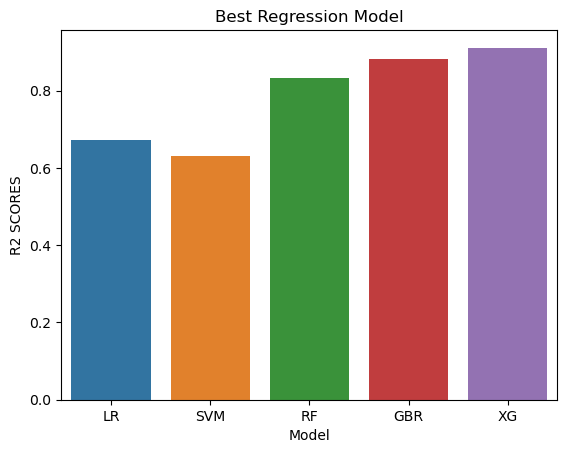

In [119]:
sns.barplot(x= 'Model', y = 'R2 SCORES', data = Pizza_Dat)
plt.title('Best Regression Model')
plt.show()

In [120]:
#Feature Importance on Random Forest regressor, GradientBoostingRegressor and Xgboost

rf.feature_importances_


array([0.02767855, 0.57956698, 0.03470887, 0.133482  , 0.18625669,
       0.01934869, 0.01433211, 0.00462612])

In [121]:
rf_fea= pd.Series(rf.feature_importances_,index = X_train.columns)


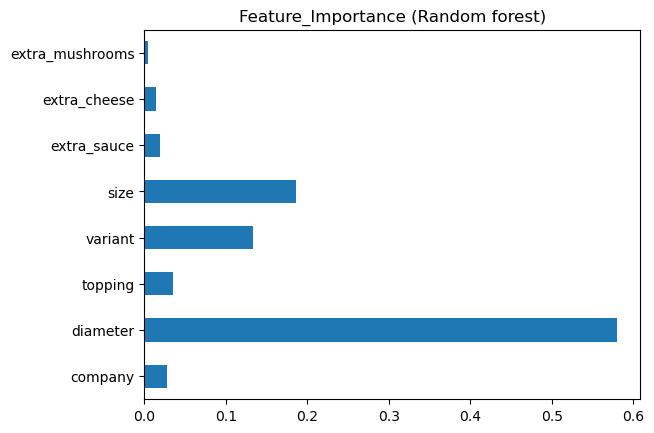

In [122]:
rf_fea.plot(kind ='barh')
plt.title('Feature_Importance (Random forest)')
plt.show()

In [123]:
xg.feature_importances_

array([0.0042859 , 0.387899  , 0.02135473, 0.05048535, 0.46481314,
       0.05491102, 0.01278152, 0.00346938], dtype=float32)

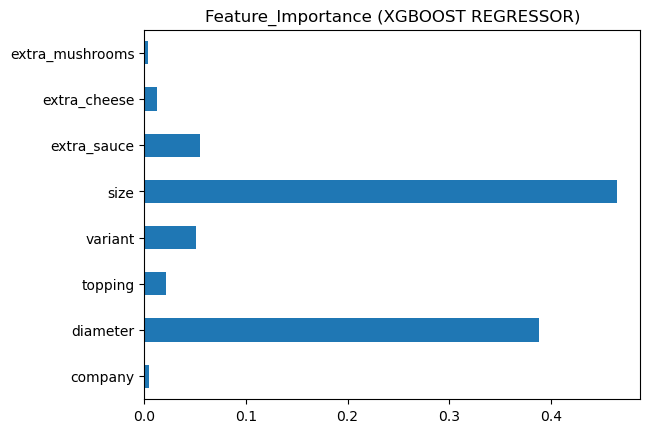

In [124]:
xg_fea= pd.Series(xg.feature_importances_,index = X_train.columns)
xg_fea.plot(kind ='barh')
plt.title('Feature_Importance (XGBOOST REGRESSOR)')
plt.show()

In [125]:
gbr.feature_importances_

array([0.0068811 , 0.63605385, 0.05232505, 0.10110777, 0.16309197,
       0.03394436, 0.00367245, 0.00292346])

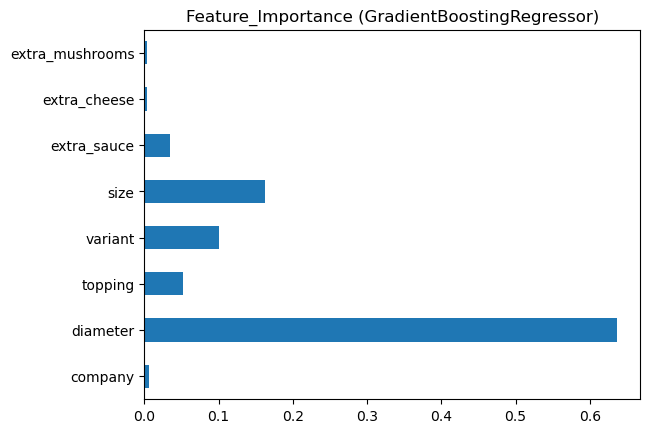

In [126]:
gbr_fea= pd.Series(gbr.feature_importances_,index = X_train.columns)
gbr_fea.plot(kind ='barh')
plt.title('Feature_Importance (GradientBoostingRegressor)')
plt.show()

In [127]:
#Saving the best model
X = Pizza_Data.drop('Price', axis= 1)
y= Pizza_Data['Price']


In [128]:
xg.fit(X,y) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [129]:
joblib.dump(xg,'Pizza Price Prediction')

['Pizza Price Prediction']

In [130]:
model = joblib.load('Pizza Price Prediction')

In [131]:
df = pd.DataFrame({
    'company': 1,
    'diameter':22.0,
    'topping': 2,
    'variant': 8,
    'size': 1,
    'extra_sauce':1,
    'extra_cheese': 1,
    'extra_mushrooms': 1
}, index =[0])

In [132]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [133]:
model.predict(df)

array([12.503633], dtype=float32)